# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score
#from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


pd.set_option("display.max_rows", None) 
pd.set_option("display.max_columns", None) 


## Reading csv file

In [4]:
train = pd.read_csv('GUIDE_Train.csv',parse_dates=['Timestamp'],nrows=100000)

In [6]:
train.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04 06:05:15+00:00,7,6,InitialAccess,NaN,TruePositive,NaN,NaN,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14 03:01:25+00:00,58,43,Exfiltration,NaN,FalsePositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13 04:52:55+00:00,423,298,InitialAccess,T1189,FalsePositive,NaN,NaN,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10 16:39:36+00:00,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15 01:08:07+00:00,9,74,Execution,NaN,TruePositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [8]:
#trainn = train.sample(n=100000, random_state=42)  # Use random_state for reproducibility
trainn = train.copy()

## Statistical Information

In [12]:
trainn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   Id                  100000 non-null  int64              
 1   OrgId               100000 non-null  int64              
 2   IncidentId          100000 non-null  int64              
 3   AlertId             100000 non-null  int64              
 4   Timestamp           100000 non-null  datetime64[ns, UTC]
 5   DetectorId          100000 non-null  int64              
 6   AlertTitle          100000 non-null  int64              
 7   Category            100000 non-null  object             
 8   MitreTechniques     42504 non-null   object             
 9   IncidentGrade       99475 non-null   object             
 10  ActionGrouped       588 non-null     object             
 11  ActionGranular      588 non-null     object             
 12  EntityType       

In [14]:
trainn.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,1.000000e+05,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.016000e+03,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.451307e+11,181.687060,71116.738560,4.056623e+05,106.903630,2958.699540,95722.599650,128819.872800,285977.381440,150153.795710,351656.721310,463561.594750,340207.302320,356135.297500,143384.208010,480118.094180,3.226971e+09,1628.046760,634.731250,859.558070,2200.683580,3342.522790,880.813340,262664.753010,107802.002320,3582.783520,4.900800,64.687090,223.584360,1350.534040,9930.924880
std,4.972306e+11,391.166851,121492.215217,4.581139e+05,420.005878,11470.995379,16176.619949,33803.271934,141108.842567,37823.818364,167033.619395,290512.716567,160497.536683,174988.285803,35794.283277,141730.982263,1.049512e+09,68.075018,12.656714,18.663775,332.114312,510.911385,12.270712,81000.886494,31949.563562,103.089733,0.696092,9.208153,62.955657,352.785033,2615.709753
min,5.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.506824e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.209068e+11,10.000000,503.000000,2.367150e+04,2.000000,2.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,91877.500000,425863.000000,442677.000000,153085.000000,529644.000000,2.730315e+09,1631.000000,635.000000,860.000000,2251.000000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000
50%,8.418136e+11,44.000000,10249.500000,2.170975e+05,9.000000,11.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,673934.000000,425863.000000,453297.000000,153085.000000,529644.000000,3.486419e+09,1631.000000,635.000000,860.000000,2251.000000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000
75%,1.279900e+12,170.000000,84911.250000,6.703705e+05,45.000000,182.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,673934.000000,425863.000000,453297.000000,153085.000000,529644.000000,4.097104e+09,1631.000000,635.000000,860.000000,2251.000000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000
max,1.709397e+12,6077.000000,599699.000000,1.721368e+06,9375.000000,113167.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,673934.000000,425863.000000,453297.000000,153085.000000,529644.000000,4.294925e+09,1631.000000,635.000000,860.000000,2251.000000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000


## Missing Columns

In [17]:
# Find completely empty columns
empty_columns = trainn.columns[trainn.isna().any()].tolist()
print("Completely empty columns:", empty_columns)

empty = trainn[['MitreTechniques', 'IncidentGrade', 'ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict']]

# Calculate percentage of empty rows for each column
empty_percentage = empty.isna().sum() / len(empty) * 100
print("\nPercentage of empty rows in each column:")
print(empty_percentage)


Completely empty columns: ['MitreTechniques', 'IncidentGrade', 'ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict']

Percentage of empty rows in each column:
MitreTechniques      57.496
IncidentGrade         0.525
ActionGrouped        99.412
ActionGranular       99.412
EmailClusterId       98.984
ThreatFamily         99.200
ResourceType         99.909
Roles                97.728
AntispamDirection    98.220
SuspicionLevel       84.876
LastVerdict          76.567
dtype: float64


In [19]:
# Drop the columns more than 90% empty data
trainn.drop(columns=['MitreTechniques','ActionGrouped','ActionGranular','EmailClusterId','ThreatFamily','ResourceType','Roles','AntispamDirection'],axis=1,inplace=True)

In [21]:
trainn.head(10)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04 06:05:15+00:00,7,6,InitialAccess,TruePositive,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14 03:01:25+00:00,58,43,Exfiltration,FalsePositive,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13 04:52:55+00:00,423,298,InitialAccess,FalsePositive,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10 16:39:36+00:00,2,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15 01:08:07+00:00,9,74,Execution,TruePositive,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,NaN,NaN,242,1445,10630
5,1322849927433,11,417400,825450,2024-06-10 13:30:56+00:00,0,0,InitialAccess,FalsePositive,Ip,Related,98799,138268,30410,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,NaN,NaN,8,6,3
6,163208760309,522,566,705663,2024-06-14 23:19:45+00:00,2,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,3306,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,Suspicious,Suspicious,242,1445,10630
7,1400159339557,125,38679,47423,2024-06-06 13:39:23+00:00,313,3919,Exfiltration,BenignPositive,MailMessage,Impacted,98799,138268,360606,160396,441377,34744,425863,453297,153085,1082,1631,635,860,2251,3421,881,289573,117668,3586,5,66,NaN,NaN,242,1445,10630
8,1219770713645,21,414,197969,2024-06-09 10:21:29+00:00,3,4,SuspiciousActivity,BenignPositive,Process,Related,98799,0,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,0,1694,3586,5,66,Suspicious,Suspicious,242,1445,10630
9,1073741827836,72,70,831157,2024-06-08 02:08:01+00:00,4,3,InitialAccess,TruePositive,User,Impacted,98799,138268,360606,160396,4070,5532,4086,4256,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,NaN,NaN,242,1445,10630


In [23]:
# Count the number of such duplicate rows
num_duplicates = trainn.duplicated().sum()
print(f"Number of duplicate rows with identical values across all columns: {num_duplicates}")

Number of duplicate rows with identical values across all columns: 20


In [25]:
trainn = trainn.drop_duplicates()

In [26]:
trainn.isnull().sum()

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade           524
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
SuspicionLevel        84856
LastVerdict           76559
CountryCode               0
State               

## Handling Missing Values

In [30]:
cat=[]
num=[]

for col in trainn.columns:
    if trainn[col].dtypes == 'O':
        cat.append(col)
    elif trainn[col].dtypes != 'O':
        num.append(col)

print(cat)
print('-----------------'*5)
print(num)

['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'SuspicionLevel', 'LastVerdict']
-------------------------------------------------------------------------------------
['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId', 'AlertTitle', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City']


In [32]:
for col in cat:
    trainn[col] = trainn[col].fillna(trainn[col].mode()[0])

In [34]:
trainn.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
SuspicionLevel        0
LastVerdict           0
CountryCode           0
State                 0
City                  0
dtype: int64

In [36]:
for col in trainn.columns:
    print('Column Name :',col,'-','Number of length :',trainn[col].nunique())
    print(trainn[col].unique())  
    print('----' * 8)

Column Name : Id - Number of length : 53282
[ 180388628218  455266534868 1056561957389 ...  549755815810  343597384041
  584115553241]
--------------------------------
Column Name : OrgId - Number of length : 2540
[   0   88  809 ... 1682 1556 2371]
--------------------------------
Column Name : IncidentId - Number of length : 50451
[   612    326  58352 ...  13621 439844 234944]
--------------------------------
Column Name : AlertId - Number of length : 82190
[ 123247  210035  712507 ... 1308734   23247 1081769]
--------------------------------
Column Name : Timestamp - Number of length : 79285
<DatetimeArray>
['2024-06-04 06:05:15+00:00', '2024-06-14 03:01:25+00:00',
 '2024-06-13 04:52:55+00:00', '2024-06-10 16:39:36+00:00',
 '2024-06-15 01:08:07+00:00', '2024-06-10 13:30:56+00:00',
 '2024-06-14 23:19:45+00:00', '2024-06-06 13:39:23+00:00',
 '2024-06-09 10:21:29+00:00', '2024-06-08 02:08:01+00:00',
 ...
 '2024-06-04 23:36:27+00:00', '2024-06-04 12:52:10+00:00',
 '2024-06-04 17:49:58+

## Data Cleaning and Preprocessing

In [39]:
trainn['year']=trainn['Timestamp'].dt.year
trainn['month']=trainn['Timestamp'].dt.month
trainn['time']=trainn['Timestamp'].dt.hour

In [41]:
counts = trainn['LastVerdict'].value_counts()
low = counts[counts <= 100].index
trainn['LastVerdict'] = trainn['LastVerdict'].apply(lambda x: 'Malicious' if x in low else x)


In [42]:
trainn.shape

(99980, 40)

In [45]:
trainn.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City', 'year',
       'month', 'time'],
      dtype='object')

In [47]:
for col in cat:
    print(trainn.groupby(['IncidentGrade',col]).size())

IncidentGrade   Category           
BenignPositive  Collection                53
                CommandAndControl       5920
                CredentialAccess        1184
                DefenseEvasion           258
                Discovery                757
                Execution               1375
                Exfiltration           11661
                Exploit                   22
                Impact                  3510
                InitialAccess          11281
                LateralMovement          276
                Malware                  985
                Persistence              555
                PrivilegeEscalation       40
                Ransomware               139
                SuspiciousActivity      5393
                UnwantedSoftware         126
FalsePositive   Collection                69
                CommandAndControl       1603
                CredentialAccess         702
                CredentialStealing         2
                Def

# Exploratory Data Analysis

## Numerical Visualisation

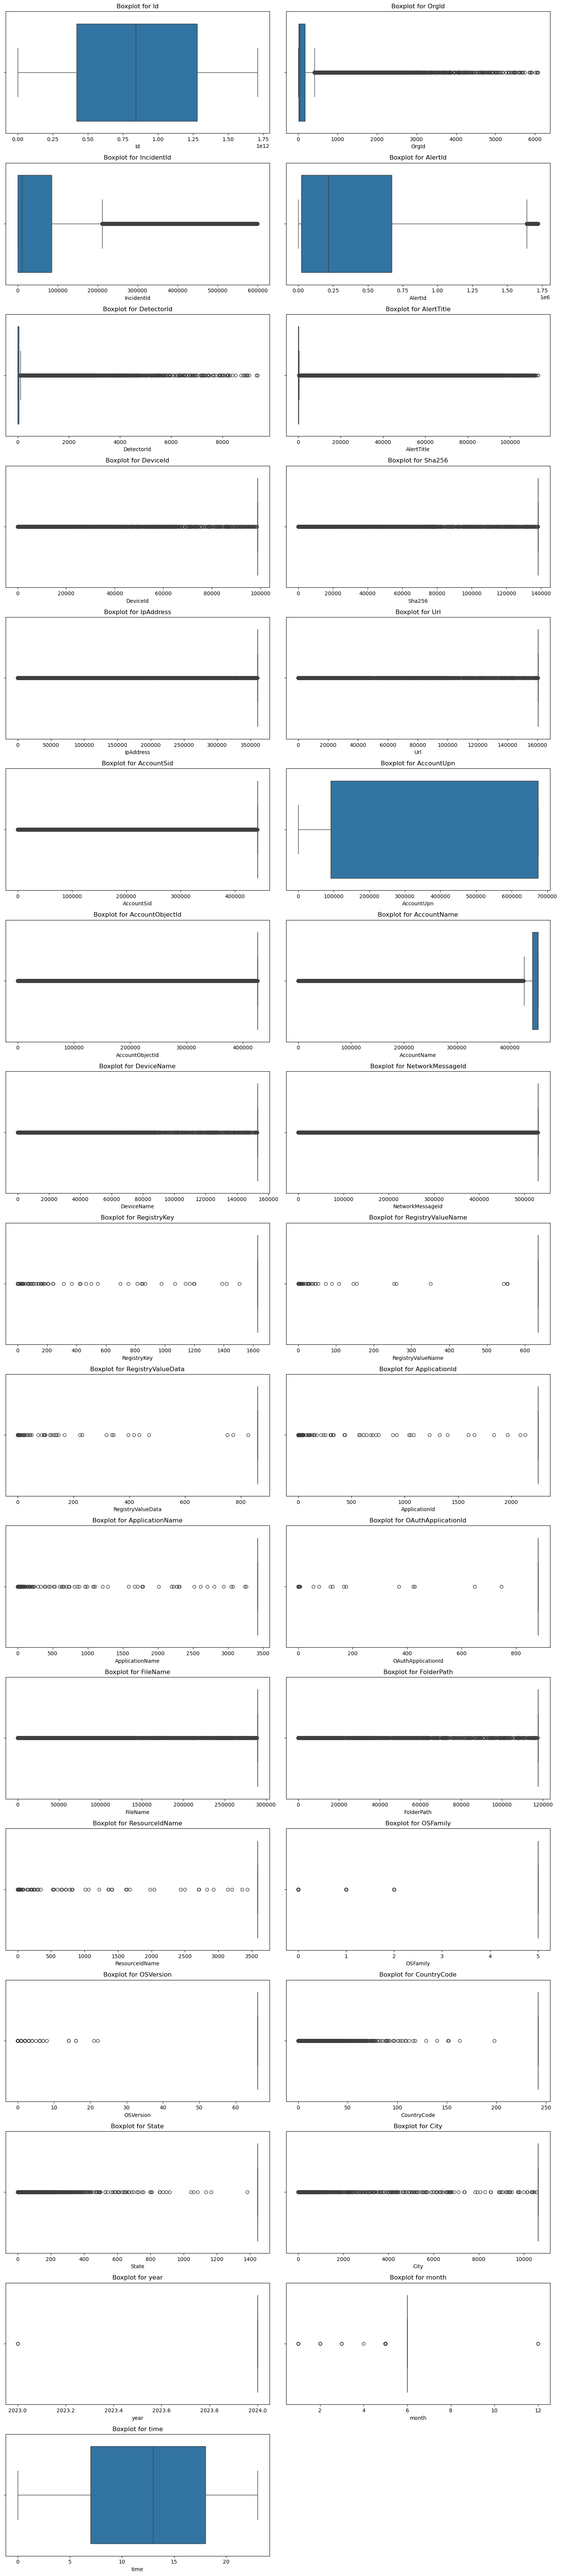

In [51]:
numerical_cols = trainn.select_dtypes(include=['int64', 'float64','int32']).columns

plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1
for col in numerical_cols:
        ax = plt.subplot(20, 2, plotnumber)
        sns.boxplot(data=trainn,x=col)
        plt.title(f'Boxplot for {col}')
        plotnumber += 1
        
plt.tight_layout()  
plt.show()

## Categorical Visualisation 

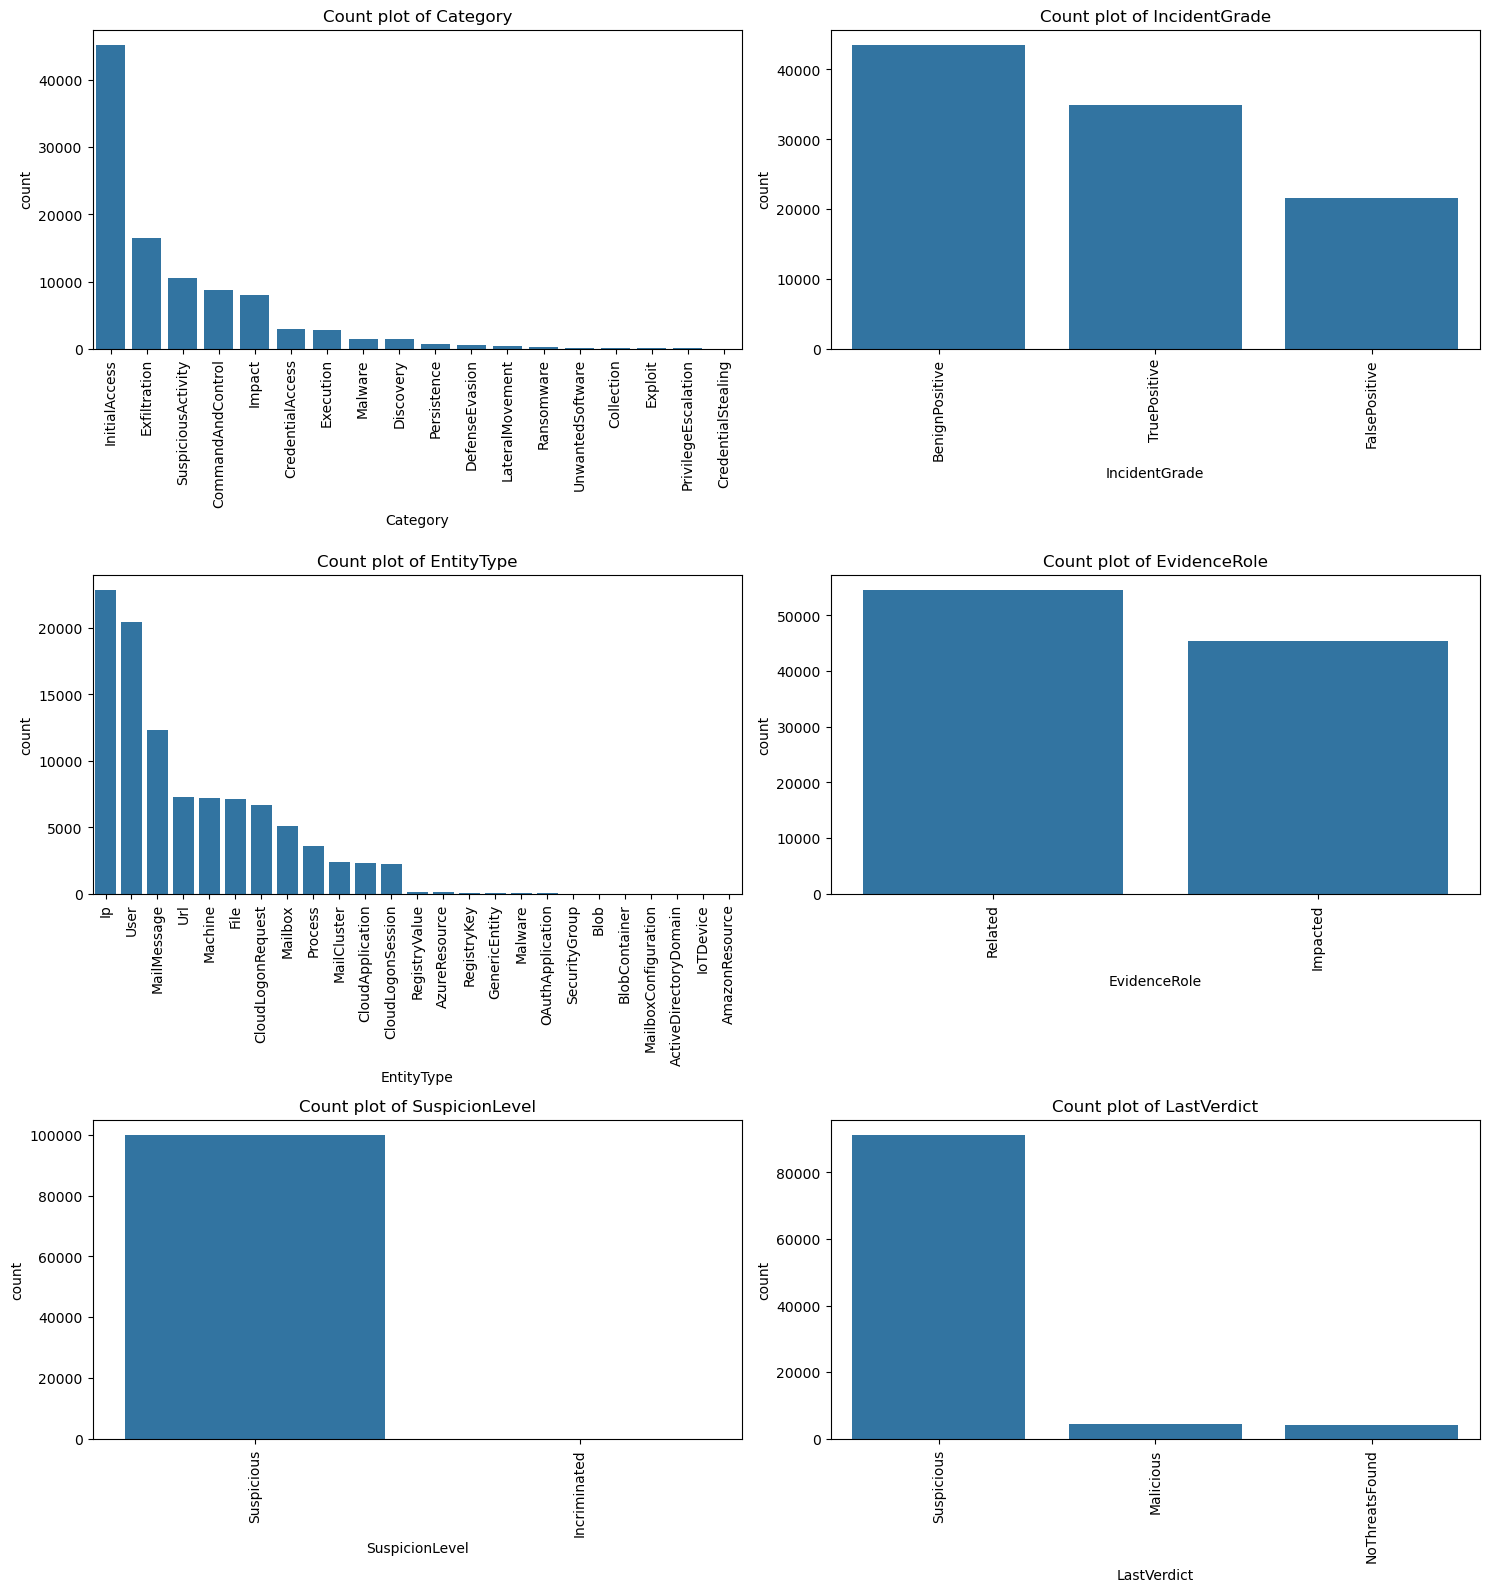

In [54]:
categorical_cols = trainn.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 80))
plotnumber = 1
for feature in categorical_cols:
    ax = plt.subplot(15, 2, plotnumber)  
    sns.countplot(data=trainn, x=feature, order=trainn[feature].value_counts().index)
    plt.xticks(rotation=90) 
    plt.title(f'Count plot of {feature}')    
    plotnumber += 1

plt.tight_layout()
plt.show()


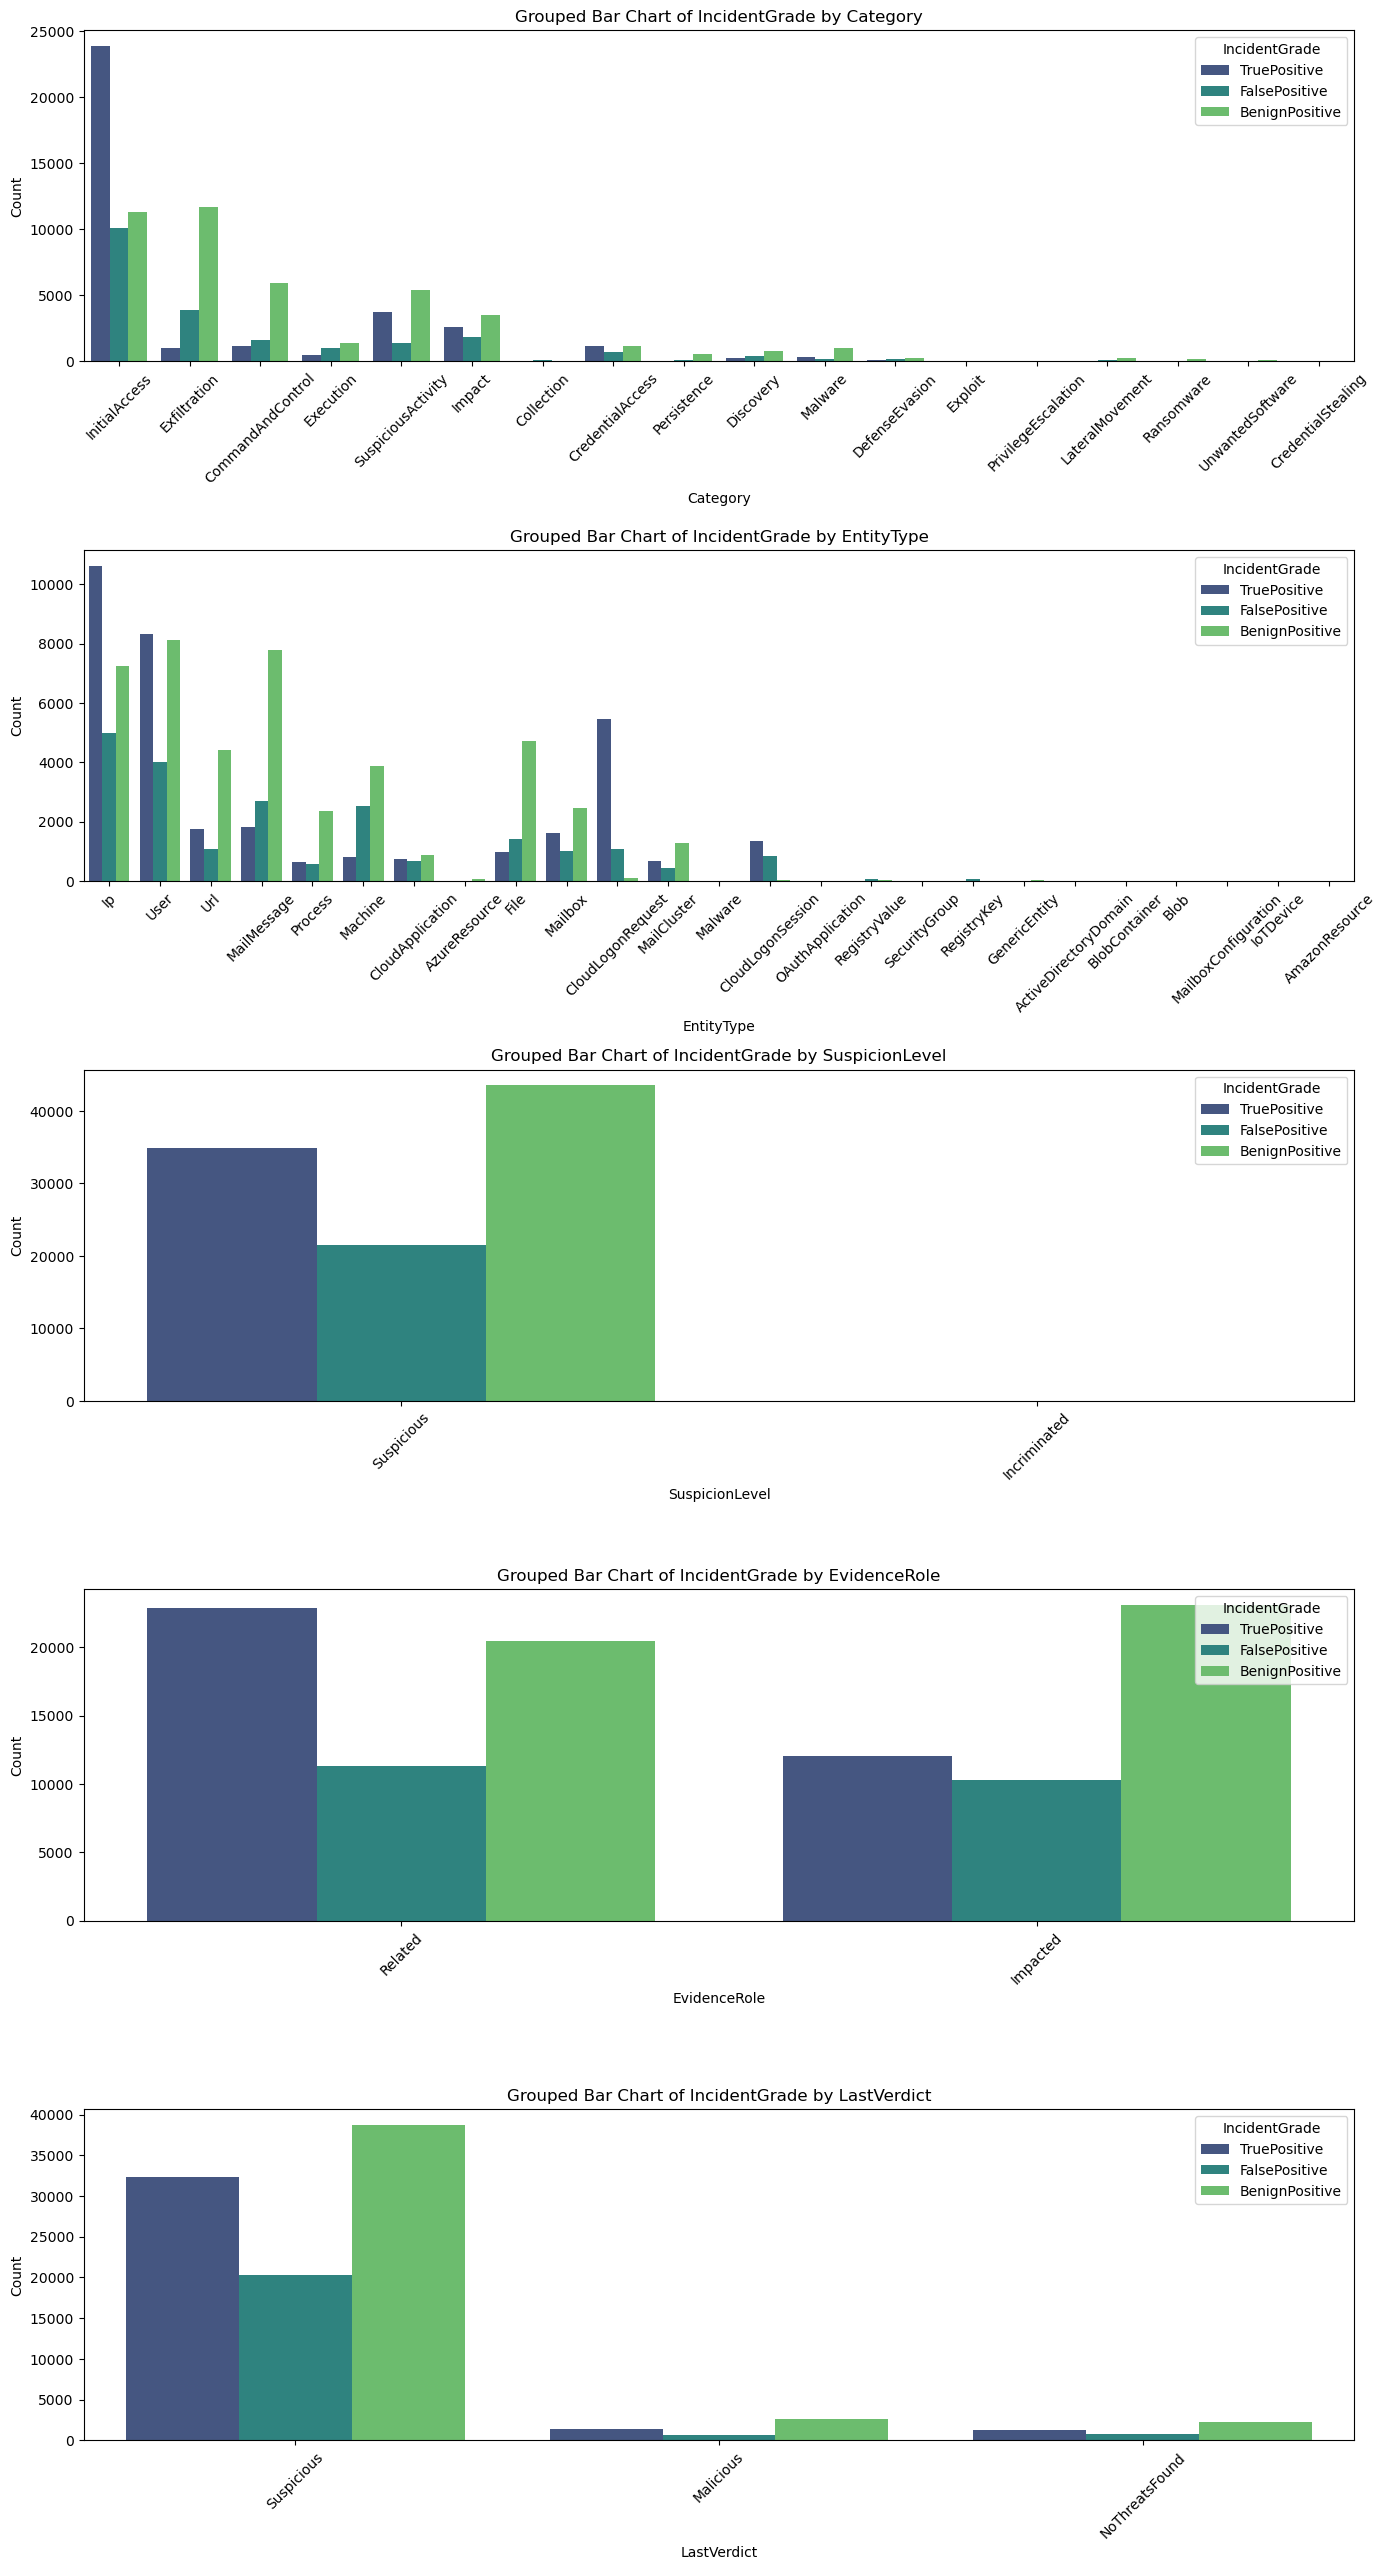

In [56]:
grouped_columns = ['Category', 'EntityType', 'SuspicionLevel', 'EvidenceRole','LastVerdict']

plt.figure(figsize=(14, 35))

for i, column in enumerate(grouped_columns, 1):
    plt.subplot(7, 1, i)
    sns.countplot(data=trainn, x=column, hue='IncidentGrade', palette="viridis")
    plt.title(f'Grouped Bar Chart of IncidentGrade by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Removing outliers

In [59]:
numerical_cols = trainn.select_dtypes(include=['int64', 'float64','int32']).columns

# Cleanning outliers using the IQR method
def clean_outliers_iqr(df, numerical_cols, method='remove'):
    cleaned_data = df.copy()
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if method == 'remove':
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
        elif method == 'cap':
            cleaned_data[col] = cleaned_data[col].clip(lower=lower_bound, upper=upper_bound)

    return cleaned_data

# Clean the data by removing outliers
cleaned_data_remove = clean_outliers_iqr(trainn, numerical_cols, method='remove')
print("Data cleaned by removing outliers. Remaining rows:", cleaned_data_remove.shape[0])

# Clean the data by capping outliers
cleaned_data_cap = clean_outliers_iqr(trainn, numerical_cols, method='cap')
print("Data cleaned by capping outliers. Remaining rows:", cleaned_data_cap.shape[0])

Data cleaned by removing outliers. Remaining rows: 8867
Data cleaned by capping outliers. Remaining rows: 99980


In [61]:
cleaned_data_cap.head(6)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,SuspicionLevel,LastVerdict,CountryCode,State,City,year,month,time
0,180388628218,0,612,123247,2024-06-04 06:05:15+00:00,7.0,6,InitialAccess,TruePositive,Ip,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,Suspicious,Suspicious,242,1445,10630,2024,6,6
1,455266534868,88,326,210035,2024-06-14 03:01:25+00:00,58.0,43,Exfiltration,FalsePositive,User,Impacted,98799,138268,360606,160396,441377,23032,425863,426747,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,Suspicious,Suspicious,242,1445,10630,2024,6,3
2,1056561957389,410,58352,712507,2024-06-13 04:52:55+00:00,109.5,298,InitialAccess,FalsePositive,Url,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,Suspicious,Suspicious,242,1445,10630,2024,6,4
3,1279900258736,92,32992,774301,2024-06-10 16:39:36+00:00,2.0,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,Suspicious,Suspicious,242,1445,10630,2024,6,16
4,214748368522,148,4359,188041,2024-06-15 01:08:07+00:00,9.0,74,Execution,TruePositive,User,Impacted,98799,138268,360606,160396,441377,592,425863,426747,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,Suspicious,Suspicious,242,1445,10630,2024,6,1
5,1322849927433,11,211524,825450,2024-06-10 13:30:56+00:00,0.0,0,InitialAccess,FalsePositive,Ip,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,Suspicious,Suspicious,242,1445,10630,2024,6,13


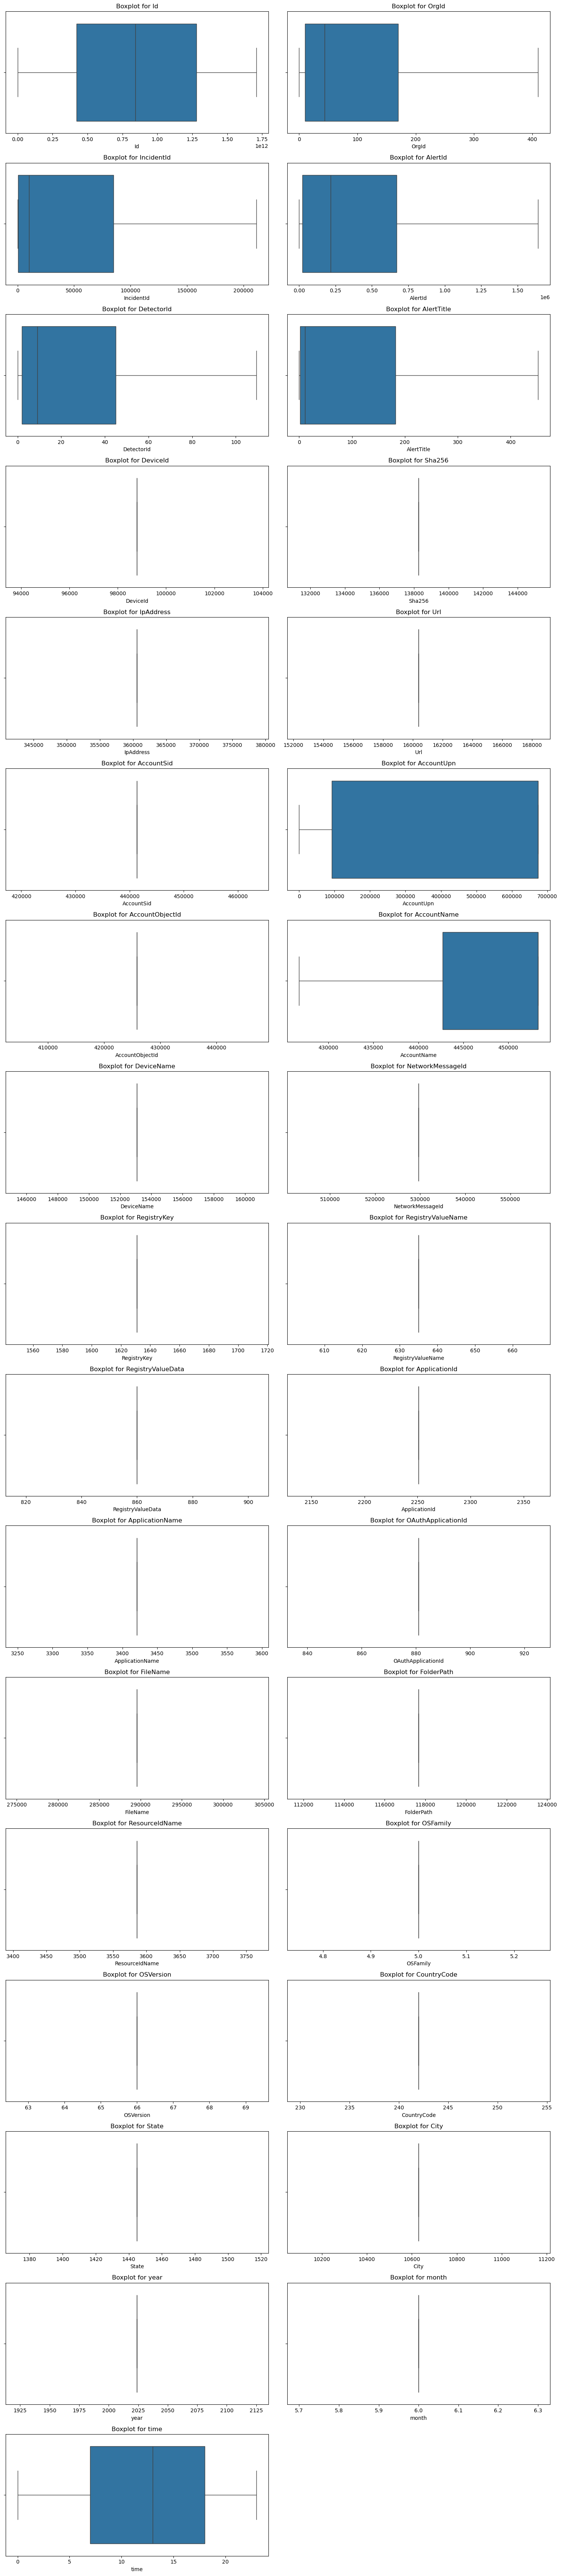

In [63]:
numerical_cols = cleaned_data_cap.select_dtypes(include=['int64', 'float64','int32']).columns

plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1
for col in numerical_cols:
        ax = plt.subplot(20, 2, plotnumber)
        sns.boxplot(data=cleaned_data_cap,x=col)
        plt.title(f'Boxplot for {col}')
        plotnumber += 1
        
plt.tight_layout()  
plt.show()

In [66]:
cleaned_data_cap.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')

In [68]:
# Removing Highly correlated columns

cleaned_data_cap.drop(["CountryCode","OSFamily","State","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"], axis =1 , inplace = True)

cleaned_data_cap.drop(['DeviceId', 'IpAddress', 'Url', 'DeviceName', 'NetworkMessageId','RegistryKey',  'RegistryValueData','ApplicationId', 'OAuthApplicationId', 
             'FileName', 'ResourceIdName', 'OSVersion', 'City','year','month'], axis =1 , inplace = True)


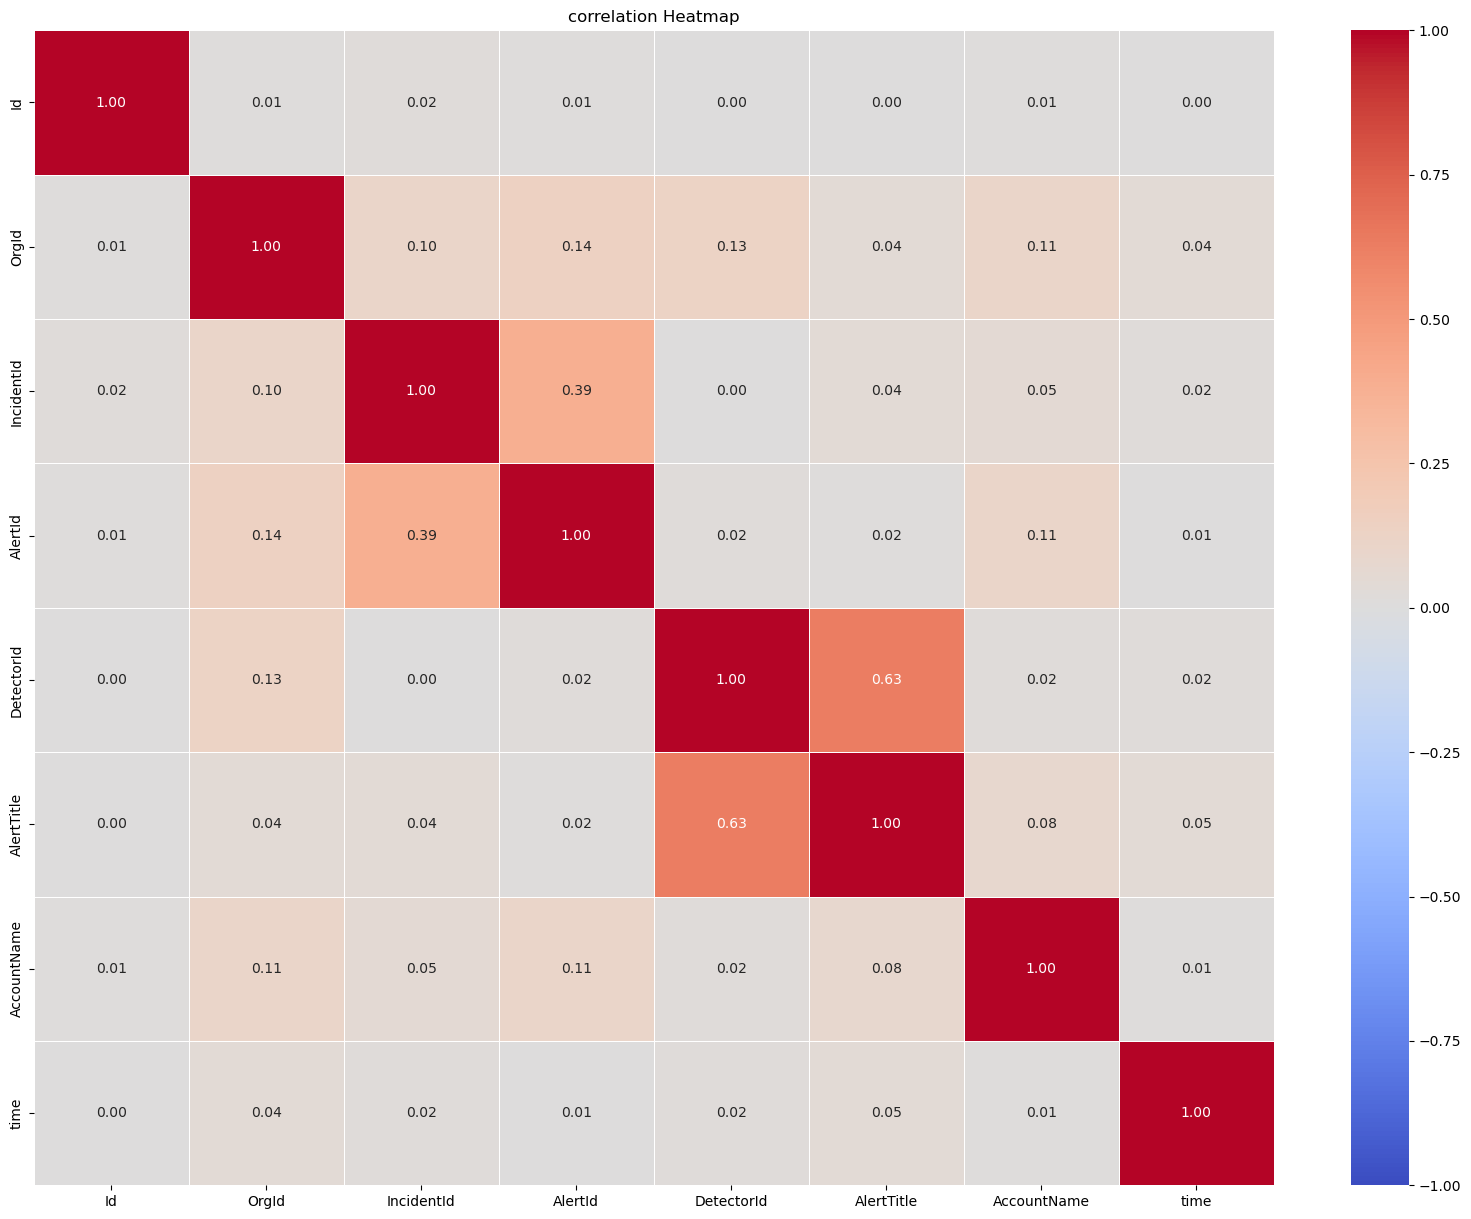

In [75]:
# selecting numerical col
nume=cleaned_data_cap.select_dtypes(include=['number'])

corr_matrix= nume.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [77]:
cleaned_data_cap.shape

(99980, 15)

In [79]:
cleaned_data_cap.head(3)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,AccountName,SuspicionLevel,LastVerdict,time
0,180388628218,0,612,123247,2024-06-04 06:05:15+00:00,7.0,6,InitialAccess,TruePositive,Ip,Related,453297,Suspicious,Suspicious,6
1,455266534868,88,326,210035,2024-06-14 03:01:25+00:00,58.0,43,Exfiltration,FalsePositive,User,Impacted,426747,Suspicious,Suspicious,3
2,1056561957389,410,58352,712507,2024-06-13 04:52:55+00:00,109.5,298,InitialAccess,FalsePositive,Url,Related,453297,Suspicious,Suspicious,4


In [81]:
from sklearn.preprocessing import LabelEncoder

label_cat = [ 'IncidentGrade', 'EvidenceRole','SuspicionLevel', 'LastVerdict']

label_encoder = LabelEncoder()

for col in label_cat:
    cleaned_data_cap[col + '_Encoded'] = label_encoder.fit_transform(cleaned_data_cap[col])

# Check the encoded columns
#print(carclean[[col + '_Encoded' for col in label_cat]].head())
cleaned_data_cap.head(3)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,AccountName,SuspicionLevel,LastVerdict,time,IncidentGrade_Encoded,EvidenceRole_Encoded,SuspicionLevel_Encoded,LastVerdict_Encoded
0,180388628218,0,612,123247,2024-06-04 06:05:15+00:00,7.0,6,InitialAccess,TruePositive,Ip,Related,453297,Suspicious,Suspicious,6,2,1,1,2
1,455266534868,88,326,210035,2024-06-14 03:01:25+00:00,58.0,43,Exfiltration,FalsePositive,User,Impacted,426747,Suspicious,Suspicious,3,1,0,1,2
2,1056561957389,410,58352,712507,2024-06-13 04:52:55+00:00,109.5,298,InitialAccess,FalsePositive,Url,Related,453297,Suspicious,Suspicious,4,1,1,1,2


In [83]:
cleaned_data_cap.drop(['IncidentGrade', 'EvidenceRole','SuspicionLevel', 'LastVerdict'], axis =1 , inplace = True)


In [85]:
# one-hot encode model_data

categorical_columns = ['Category','EntityType']
cleancyber = pd.get_dummies(cleaned_data_cap, columns=categorical_columns,dtype=int)
cleancyber.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,AccountName,time,IncidentGrade_Encoded,EvidenceRole_Encoded,SuspicionLevel_Encoded,LastVerdict_Encoded,Category_Collection,Category_CommandAndControl,Category_CredentialAccess,Category_CredentialStealing,Category_DefenseEvasion,Category_Discovery,Category_Execution,Category_Exfiltration,Category_Exploit,Category_Impact,Category_InitialAccess,Category_LateralMovement,Category_Malware,Category_Persistence,Category_PrivilegeEscalation,Category_Ransomware,Category_SuspiciousActivity,Category_UnwantedSoftware,EntityType_ActiveDirectoryDomain,EntityType_AmazonResource,EntityType_AzureResource,EntityType_Blob,EntityType_BlobContainer,EntityType_CloudApplication,EntityType_CloudLogonRequest,EntityType_CloudLogonSession,EntityType_File,EntityType_GenericEntity,EntityType_IoTDevice,EntityType_Ip,EntityType_Machine,EntityType_MailCluster,EntityType_MailMessage,EntityType_Mailbox,EntityType_MailboxConfiguration,EntityType_Malware,EntityType_OAuthApplication,EntityType_Process,EntityType_RegistryKey,EntityType_RegistryValue,EntityType_SecurityGroup,EntityType_Url,EntityType_User
0,180388628218,0,612,123247,2024-06-04 06:05:15+00:00,7.0,6,453297,6,2,1,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,455266534868,88,326,210035,2024-06-14 03:01:25+00:00,58.0,43,426747,3,1,0,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1056561957389,410,58352,712507,2024-06-13 04:52:55+00:00,109.5,298,453297,4,1,1,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1279900258736,92,32992,774301,2024-06-10 16:39:36+00:00,2.0,2,453297,16,0,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,214748368522,148,4359,188041,2024-06-15 01:08:07+00:00,9.0,74,426747,1,2,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [87]:
cleancyber.drop(['Timestamp'],axis=1,inplace=True)

In [89]:
cleancyber.head(3)

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,AccountName,time,IncidentGrade_Encoded,EvidenceRole_Encoded,SuspicionLevel_Encoded,LastVerdict_Encoded,Category_Collection,Category_CommandAndControl,Category_CredentialAccess,Category_CredentialStealing,Category_DefenseEvasion,Category_Discovery,Category_Execution,Category_Exfiltration,Category_Exploit,Category_Impact,Category_InitialAccess,Category_LateralMovement,Category_Malware,Category_Persistence,Category_PrivilegeEscalation,Category_Ransomware,Category_SuspiciousActivity,Category_UnwantedSoftware,EntityType_ActiveDirectoryDomain,EntityType_AmazonResource,EntityType_AzureResource,EntityType_Blob,EntityType_BlobContainer,EntityType_CloudApplication,EntityType_CloudLogonRequest,EntityType_CloudLogonSession,EntityType_File,EntityType_GenericEntity,EntityType_IoTDevice,EntityType_Ip,EntityType_Machine,EntityType_MailCluster,EntityType_MailMessage,EntityType_Mailbox,EntityType_MailboxConfiguration,EntityType_Malware,EntityType_OAuthApplication,EntityType_Process,EntityType_RegistryKey,EntityType_RegistryValue,EntityType_SecurityGroup,EntityType_Url,EntityType_User
0,180388628218,0,612,123247,7.0,6,453297,6,2,1,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,455266534868,88,326,210035,58.0,43,426747,3,1,0,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1056561957389,410,58352,712507,109.5,298,453297,4,1,1,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [91]:
cleancyber.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'AccountName', 'time', 'IncidentGrade_Encoded', 'EvidenceRole_Encoded',
       'SuspicionLevel_Encoded', 'LastVerdict_Encoded', 'Category_Collection',
       'Category_CommandAndControl', 'Category_CredentialAccess',
       'Category_CredentialStealing', 'Category_DefenseEvasion',
       'Category_Discovery', 'Category_Execution', 'Category_Exfiltration',
       'Category_Exploit', 'Category_Impact', 'Category_InitialAccess',
       'Category_LateralMovement', 'Category_Malware', 'Category_Persistence',
       'Category_PrivilegeEscalation', 'Category_Ransomware',
       'Category_SuspiciousActivity', 'Category_UnwantedSoftware',
       'EntityType_ActiveDirectoryDomain', 'EntityType_AmazonResource',
       'EntityType_AzureResource', 'EntityType_Blob',
       'EntityType_BlobContainer', 'EntityType_CloudApplication',
       'EntityType_CloudLogonRequest', 'EntityType_CloudLogonSession',
       'EntityTyp

In [95]:
#cleancyber.to_csv('traincyber.csv',index=False)

## Transformations

In [98]:
trainn['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    43535
TruePositive      34882
FalsePositive     21563
Name: count, dtype: int64

C:\Users\mraja\AppData\Local\Temp\ipykernel_2432\2857792788.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=trainn,x=trainn['IncidentGrade'],palette='viridis')


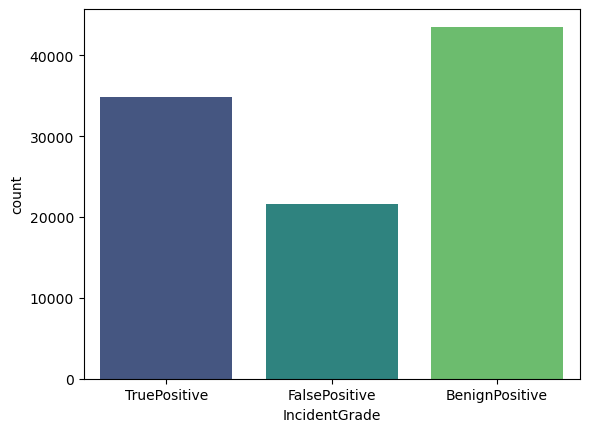

In [100]:
sns.countplot(data=trainn,x=trainn['IncidentGrade'],palette='viridis')
plt.show()

In [105]:
X = cleancyber.drop(columns=['IncidentGrade_Encoded'],axis=1) # Replace with your actual feature columns
y = cleancyber['IncidentGrade_Encoded']  # Replace with your target column


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale both train and test sets (assuming numerical features are at the end)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [111]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", pd.Series(y_train_smote).value_counts())


Original class distribution:
 IncidentGrade_Encoded
0    34879
2    27824
1    17281
Name: count, dtype: int64
Resampled class distribution:
 IncidentGrade_Encoded
2    34879
0    34879
1    34879
Name: count, dtype: int64


In [112]:
model = LogisticRegression(max_iter=200, solver='lbfgs')
model.fit(X_train_smote, y_train_smote)


y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.60

Confusion Matrix:
[[5264 1774 1618]
 [1444 1959  879]
 [1284 1036 4738]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.61      0.63      8656
           1       0.41      0.46      0.43      4282
           2       0.65      0.67      0.66      7058

    accuracy                           0.60     19996
   macro avg       0.57      0.58      0.58     19996
weighted avg       0.60      0.60      0.60     19996



In [115]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_smote, y_train_smote)


# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)



Accuracy: 0.88
Confusion Matrix:
[[7927  379  350]
 [ 561 3546  175]
 [ 680  294 6084]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      8656
           1       0.84      0.83      0.83      4282
           2       0.92      0.86      0.89      7058

    accuracy                           0.88     19996
   macro avg       0.88      0.87      0.87     19996
weighted avg       0.88      0.88      0.88     19996



In [117]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_classifier.fit(X_train_smote, y_train_smote)


# Predict on the test set
y_pred = gb_classifier.predict(X_test_scaled)


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)




Accuracy: 0.80
Confusion Matrix:
[[7490  858  308]
 [ 885 3242  155]
 [1096  607 5355]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      8656
           1       0.69      0.76      0.72      4282
           2       0.92      0.76      0.83      7058

    accuracy                           0.80     19996
   macro avg       0.80      0.79      0.79     19996
weighted avg       0.81      0.80      0.81     19996

